# PLOT DATA

This notebook imports the obtained results for varying horizon lengths, AGV group sizes and random start/goal/delay configurations.

In [1]:
import logging
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import numpy as np
import random
import seaborn as sns
import pandas as pd
import statistics as stat
import os
import yaml
import glob

# WHERE TO SAVE THE FIGURES?
save_delay_vs_improv = "/home/blr7rng/Documents/thesis/msc-thesis/j/delay_vs_improv/"
save_horizon_vs_improv = "/home/blr7rng/Documents/thesis/msc-thesis/j/horizon_vs_improv/"

# 1 Import and Read Result Data

## 1.1 Load Data

In [2]:
data = {"AGVs": [], "randseed": [], "delay": [], "horizon": [], "total_time": [], "improvement": []}

yaml_list = glob.glob("ICAPS/*.yaml")
horizon_0_data = {"AGVs": [], "randseed": [], "delay": [], "total_time": []}

for file in yaml_list:
    split_filename = file.split("_")
    horizon = str(split_filename[-1].split(".")[0])
    delay = str(split_filename[-3])
#     if ((int(delay) == 3) or (int(delay) == 25)):
    seed = str(split_filename[-5])
    AGVs = str(split_filename[-7])
    with open(file, "r") as stream:
        #try:
        yaml_data = yaml.safe_load(stream)
        cumulative_time = yaml_data["results"]["total time"]
        data["AGVs"].append(int(AGVs))
        data["randseed"].append(int(seed))
        data["delay"].append(int(delay))
        data["horizon"].append(int(horizon))
        data["total_time"].append(int(cumulative_time))
        data["improvement"].append(int(cumulative_time))

#             except yaml.YAMLError as exc:
#                 print(exc)

## 1.2 Calculate improvement metric

In [3]:
df = pd.DataFrame(data, columns=["AGVs", "randseed", "delay", "horizon", "total_time", "improvement"])
# Get the 0 horizon data
df_0 = df[df.horizon == 0]

newdata = {"AGVs": [], "randseed": [], "delay": [], "horizon": [], "total_time": [], "improvement": []}

no_baseline_cnt = 0
no_baseline_list = []

for index, row in df.iterrows():
    AGVs = row["AGVs"]
    randseed = row["randseed"]
    delay = row["delay"]
    horizon = row["horizon"]
    total_time = row["total_time"]
    
    try: 
        baseline = df_0[(df_0.AGVs == AGVs) & (df_0.randseed == randseed) & (df_0.delay == delay)].iloc[0]
        baseline_time = baseline["total_time"]
        improvement = 100*(baseline_time-total_time)/baseline_time
        newdata["AGVs"].append(int(AGVs))
        newdata["randseed"].append(int(seed))
        newdata["delay"].append(int(delay))
        newdata["horizon"].append(int(horizon))
        newdata["total_time"].append(int(cumulative_time))
        newdata["improvement"].append(float(improvement))
    except IndexError:
        # if no baseline (Horizon = 0) is found, do not add this data: cannot be compared
        no_baseline_cnt += 1
        no_baseline_str = str(AGVs) + " \t " + str(randseed) + " \t " + str(delay) + " \t " + str(horizon)
        no_baseline_list.append(no_baseline_str)
        
print("No baseline count: {}".format(no_baseline_cnt))
print("List of baselines missing:")
print("AGVs \t seed \t delay \t horizon")
print("---------------------------------")
for row in no_baseline_list:
    print(row)
print("---------------------------------")

dfnew = pd.DataFrame(newdata, columns=["AGVs", "randseed", "delay", "horizon", "total_time", "improvement"])
print(dfnew)

No baseline count: 562
List of baselines missing:
AGVs 	 seed 	 delay 	 horizon
---------------------------------
30 	 18 	 10 	 10
60 	 121 	 6 	 10
60 	 52 	 1 	 15
60 	 61 	 5 	 5
40 	 31 	 10 	 6
60 	 121 	 2 	 14
60 	 101 	 10 	 6
40 	 30 	 10 	 6
50 	 27 	 10 	 10
60 	 121 	 10 	 8
60 	 72 	 1 	 15
50 	 16 	 10 	 15
60 	 40 	 1 	 10
60 	 72 	 5 	 11
50 	 15 	 10 	 6
60 	 52 	 10 	 5
60 	 72 	 1 	 5
60 	 51 	 10 	 11
50 	 30 	 10 	 10
40 	 14 	 10 	 15
60 	 54 	 5 	 7
60 	 53 	 10 	 6
60 	 101 	 6 	 8
60 	 161 	 2 	 7
50 	 14 	 10 	 6
60 	 73 	 1 	 10
40 	 37 	 10 	 6
50 	 23 	 10 	 15
60 	 121 	 10 	 7
60 	 61 	 10 	 9
40 	 16 	 10 	 15
50 	 29 	 10 	 10
30 	 31 	 10 	 15
40 	 36 	 10 	 6
50 	 16 	 10 	 6
50 	 37 	 10 	 6
60 	 52 	 1 	 9
60 	 52 	 10 	 7
60 	 61 	 1 	 5
60 	 2 	 10 	 6
50 	 37 	 10 	 10
40 	 27 	 10 	 10
50 	 23 	 10 	 10
60 	 40 	 1 	 9
60 	 62 	 1 	 10
50 	 15 	 10 	 10
30 	 30 	 10 	 6
60 	 73 	 2 	 11
40 	 33 	 10 	 6
60 	 53 	 1 	 5
30 	 39 	 10 	 15
60 	 53

# 2 Delay vs Improvement results

## 2.1 Overlayed Plot of all AGV sizes

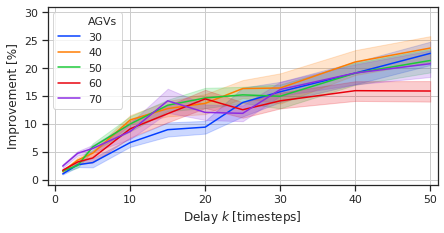

In [11]:
sns.set(style="ticks")
sns.set_palette("bright")
sns_col = sns.color_palette("bright", n_colors=5)

for horizon in [5]:
    df_new_hor = dfnew[dfnew.horizon == horizon]

    plt.figure()
    sns.lineplot(x="delay", y="improvement",
             hue="AGVs",
             ci=64,
             data=df_new_hor,
             palette=sns_col)
    plt.ylim(-1,31)
    plt.xlabel("Delay $k$ [timesteps]")
    plt.ylabel("Improvement [%]")
    plt.xlim(-1,51)
    plt.grid(True)
    plt.legend(loc="upper left")
    ax = plt.gca()
    ax.figure.set_size_inches(9,4.5)
    plt.subplots_adjust(left=0.07, bottom=0.12, right=0.98, top=0.98, wspace=None, hspace=None)
    
    ax.figure.set_size_inches(6,3)
    plt.subplots_adjust(left=0.095, bottom=0.17, right=0.998, top=0.996, wspace=None, hspace=None)


    plt.savefig(save_delay_vs_improv + "improvement_delay_all_H_{}.pdf".format(horizon), format="pdf", pad_inches=0.01, transparent=True)

## 2.2 Individual plot for each AGV group size

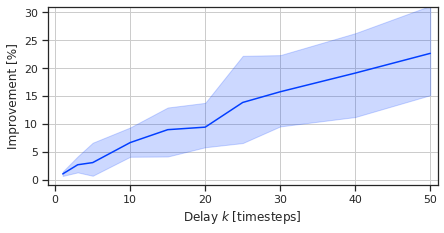

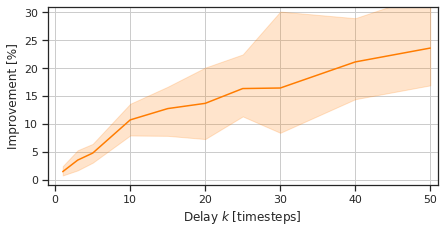

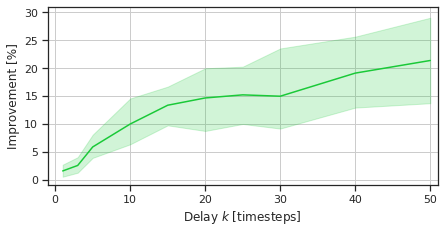

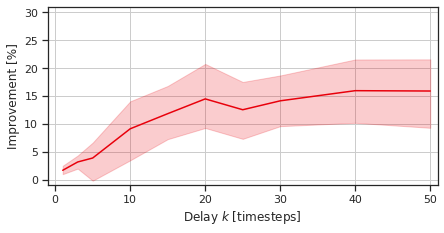

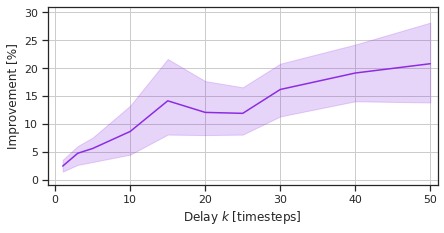

In [5]:
sns.set(style="ticks")
sns.set_palette("bright")
sns_col = sns.color_palette("bright", n_colors=5)
# print(sns_col)

for horizon in [5]:
    df_new_hor = dfnew[dfnew.horizon == horizon]
    idx = 0
    for agv_cnt in [30,40,50,60,70]:
        
        df_new_agvs = df_new_hor[df_new_hor.AGVs == agv_cnt]

        plt.figure(idx)
        sns.lineplot(x="delay", y="improvement",
                 hue="AGVs",
                 ci=100,
                 data=df_new_agvs,
                 palette=[sns_col[idx]],
                 legend=False)
        idx += 1
        plt.ylim(-1,31)
        plt.xlabel("Delay $k$ [timesteps]")
        plt.ylabel("Improvement [%]")
        plt.xlim(-1,51)
        plt.grid(True)
#         plt.legend(loc="upper left")
        ax = plt.gca()
        ax.figure.set_size_inches(6,3)
        plt.subplots_adjust(left=0.095, bottom=0.17, right=0.998, top=0.996, wspace=None, hspace=None)

        plt.savefig(save_delay_vs_improv + "improvement_delay_AGVs_{}_H_{}.pdf".format(agv_cnt, horizon), format="pdf", pad_inches=0.01, transparent=True)

# 3 Horizon vs Improvement results

## 3.1 Delay k = 3

Delay k = 3
 sim count for 30 AGVs: 119
 sim count for 40 AGVs: 112
 sim count for 50 AGVs: 101
 sim count for 60 AGVs: 83
 sim count for 70 AGVs: 60


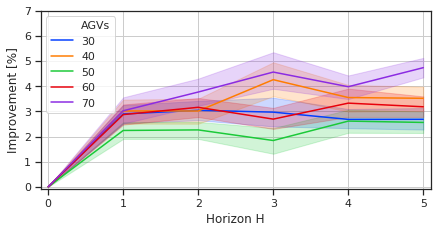

In [10]:
sns.set(style="ticks")
sns.set_palette("bright")
sns_col = sns.color_palette("bright", n_colors=5)

# Delay amount
k = 3 
df_improv = dfnew[dfnew.delay == k]
df_improv_30 = df_improv[df_improv.AGVs == 30]
df_improv_40 = df_improv[df_improv.AGVs == 40]
df_improv_50 = df_improv[df_improv.AGVs == 50]
df_improv_60 = df_improv[df_improv.AGVs == 60]
df_improv_70 = df_improv[df_improv.AGVs == 70]
print("Delay k = {}".format(k))
print(" sim count for 30 AGVs: {}".format(len(df_improv_30.index)))
print(" sim count for 40 AGVs: {}".format(len(df_improv_40.index)))
print(" sim count for 50 AGVs: {}".format(len(df_improv_50.index)))
print(" sim count for 60 AGVs: {}".format(len(df_improv_60.index)))
print(" sim count for 70 AGVs: {}".format(len(df_improv_70.index)))

plt.figure(1)
ax = plt.gca()
# ax.set(yscale="log")
sns.lineplot(x="horizon", y="improvement",
            hue="AGVs",
            ci=64,
            data=df_improv,
            palette=sns_col)

plt.xlabel("Horizon H")
plt.ylabel("Improvement [%]")
plt.grid()

ax = plt.gca()
plt.xlim(-0.1,5.1)
plt.ylim(-0.1,7,1)
ax.figure.set_size_inches(7,4)
plt.subplots_adjust(left=0.12, bottom=0.13, right=0.98, top=0.98, wspace=None, hspace=None)

ax.figure.set_size_inches(9,4.5)
plt.subplots_adjust(left=0.07, bottom=0.12, right=0.98, top=0.98, wspace=None, hspace=None)

ax.figure.set_size_inches(6,3)
plt.subplots_adjust(left=0.095, bottom=0.17, right=0.998, top=0.996, wspace=None, hspace=None)

plt.savefig(save_horizon_vs_improv + "k_3/horizon_improve_all.pdf", format="pdf", pad_inches=0.01, transparent=True)

### Individual Plots for delay k=3

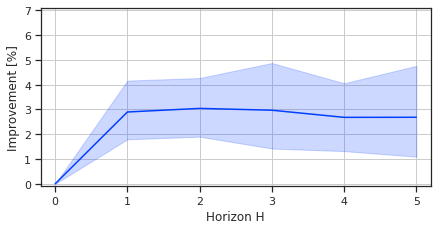

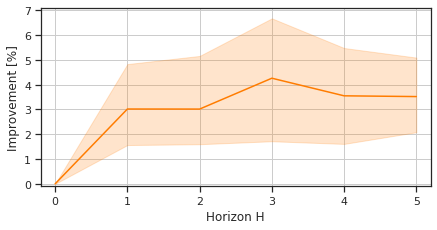

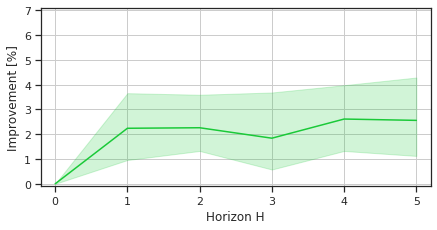

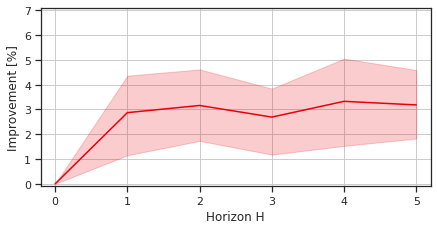

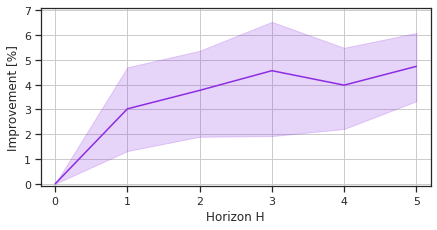

In [7]:
sns.set(style="ticks")
sns.set_palette("bright")
sns_col = sns.color_palette("bright", n_colors=5)

# Delay amount
k = 3 
df_improv = dfnew[dfnew.delay == k]

idx = 0
for agv_cnt in [30,40,50,60,70]:

    df_new_agvs = df_improv[df_improv.AGVs == agv_cnt]

    plt.figure(idx)
    sns.lineplot(x="horizon", y="improvement",
             hue="AGVs",
             ci=100,
             data=df_new_agvs,
             palette=[sns_col[idx]],
            legend=False)
    idx += 1
    plt.xlabel("Horizon H")
    plt.ylabel("Improvement [%]")
    plt.grid(True)
    plt.ylim(-0.1,7.1)
    plt.xlim(-0.2,5.2)
#     plt.legend(loc="upper left")

    ax = plt.gca()
    ax.figure.set_size_inches(4,3)
    plt.subplots_adjust(left=0.16, bottom=0.16, right=0.98, top=0.98, wspace=None, hspace=None)
    
    ax.figure.set_size_inches(6,3)
    plt.subplots_adjust(left=0.095, bottom=0.17, right=0.998, top=0.996, wspace=None, hspace=None)

    plt.savefig(save_horizon_vs_improv + "k_3/horizon_improve_{}.pdf".format(agv_cnt), format="pdf", pad_inches=0.01, transparent=True)


## 3.2 Delay k = 25

Delay k = 25
 sim count for 30 AGVs: 137
 sim count for 40 AGVs: 250
 sim count for 50 AGVs: 250
 sim count for 60 AGVs: 187
 sim count for 70 AGVs: 213


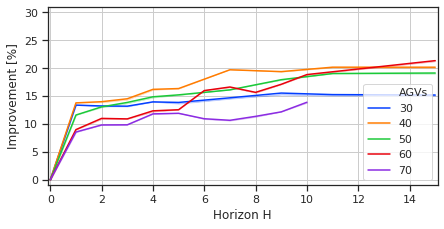

In [8]:
sns.set(style="ticks")
sns.set_palette("bright")
sns_col = sns.color_palette("bright", n_colors=5)

# Delay amount
k = 25 
df_improv = dfnew[dfnew.delay == k]
df_improv_30 = df_improv[df_improv.AGVs == 30]
df_improv_40 = df_improv[df_improv.AGVs == 40]
df_improv_50 = df_improv[df_improv.AGVs == 50]
df_improv_60 = df_improv[df_improv.AGVs == 60]
df_improv_70 = df_improv[df_improv.AGVs == 70]
print("Delay k = {}".format(k))
print(" sim count for 30 AGVs: {}".format(len(df_improv_30.index)))
print(" sim count for 40 AGVs: {}".format(len(df_improv_40.index)))
print(" sim count for 50 AGVs: {}".format(len(df_improv_50.index)))
print(" sim count for 60 AGVs: {}".format(len(df_improv_60.index)))
print(" sim count for 70 AGVs: {}".format(len(df_improv_70.index)))

plt.figure(2)
ax = plt.gca()
# ax.set(yscale="log")
sns.lineplot(x="horizon", y="improvement",
            hue="AGVs",
            ci=1,
            data=df_improv,
            palette=sns_col)

plt.xlabel("Horizon H")
plt.ylabel("Improvement [%]")
plt.grid(True)
plt.ylim(-1,31)
plt.xlim(-0.1,15.1)

ax = plt.gca()
ax.figure.set_size_inches(7,4)
plt.subplots_adjust(left=0.12, bottom=0.13, right=0.98, top=0.98, wspace=None, hspace=None)

ax.figure.set_size_inches(6,3)
plt.subplots_adjust(left=0.095, bottom=0.17, right=0.998, top=0.996, wspace=None, hspace=None)


plt.savefig(save_horizon_vs_improv + "k_25/horizon_improve_all.pdf", format="pdf", pad_inches=0.01, transparent=True)
# plt.savefig(save_loc_icaps + "improvement_vs_horizon_k_25.pdf", format="pdf", pad_inches=0.01, transparent=True)

### Individual Plots for delay k=25

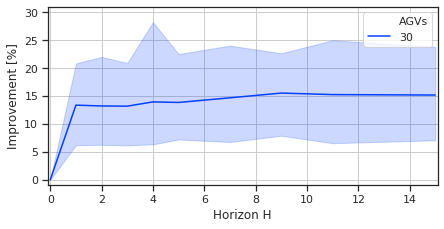

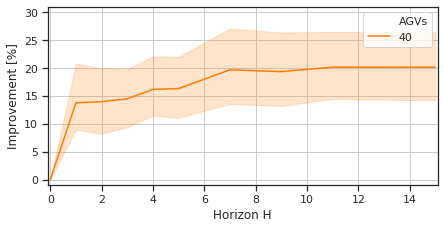

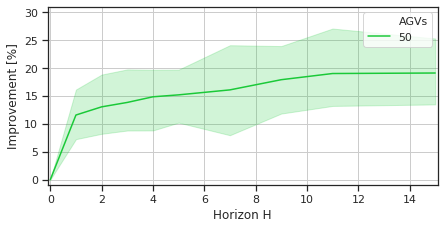

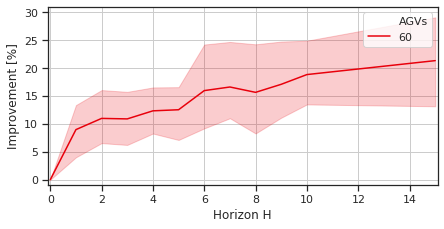

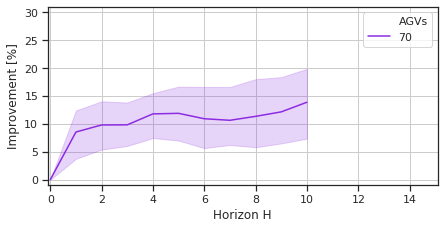

In [9]:
sns.set(style="ticks")
sns.set_palette("bright")
sns_col = sns.color_palette("bright", n_colors=5)

# Delay amount
k = 25 
df_improv = dfnew[dfnew.delay == k]

idx = 0
for agv_cnt in [30,40,50,60,70]:

    df_new_agvs = df_improv[df_improv.AGVs == agv_cnt]

    plt.figure(idx)
    sns.lineplot(x="horizon", y="improvement",
             hue="AGVs",
             ci=100,
             data=df_new_agvs,
             palette=[sns_col[idx]])
    idx += 1
    plt.xlabel("Horizon H")
    plt.ylabel("Improvement [%]")
    plt.grid(True)
    plt.ylim(-1,31)
    plt.xlim(-0.1,15.1)
#     plt.legend(loc="upper left")
    
    ax = plt.gca()
    ax.figure.set_size_inches(4,3)
    plt.subplots_adjust(left=0.15, bottom=0.17, right=0.98, top=0.98, wspace=None, hspace=None)
    
    ax.figure.set_size_inches(6,3)
    plt.subplots_adjust(left=0.095, bottom=0.17, right=0.998, top=0.996, wspace=None, hspace=None)

    plt.savefig(save_horizon_vs_improv + "k_25/horizon_improve_{}.pdf".format(agv_cnt), format="pdf", pad_inches=0.01, transparent=True)
